In [5]:
import numpy as np
from matplotlib import pyplot as plt
import math

### Toy dataset
$f(x) = \sin(2\pi x) + \epsilon$
### Target function
$y = \sin(2\pi x)$

In [6]:
class DataSet:
    def __init__(self, model, err_model=lambda x, n : np.random.normal(0, 0.3, n), x_range=(0, 1), train=10, test=400):
        self.train=train
        self.test=test
        self.model = model
        self.x_train = np.linspace(x_range[0], x_range[1], train)
        self.t_train = np.array([model(x) for x in self.x_train])
        err = err_model(self.x_train, train)
        self.y_train = self.t_train + err
        
        self.x_test = np.linspace(x_range[0], x_range[1], test)
        self.t_test = np.array([model(x) for x in self.x_test])
        err = err_model(self.x_train, test)
        self.y_test = self.t_test + err
    
    
    def plot(self, prediction=None):
        plt.scatter(self.x_train, self.y_train, color="red", label="data")
        plt.plot(self.x_test, self.t_test, color="green", label="model")
        if prediction is not None:
            plt.plot(self.x_test, prediction, color="blue", label="prediction")
        plt.legend()
        plt.show
    
    
    def linreg(self, *phis):
        X_train = np.array([phi(self.x_train) for phi in phis])
        w = np.linalg.inv(X_train @ X_train.T) @ X_train @ self.y_train
        X_test = np.array([phi(self.x_test) for phi in phis])
        prediction_test = X_test.T @ w
        prediction_train = X_train.T @ w
        return w, prediction_train, X_train, prediction_test, X_test,  
    
    
    def linreg_poly(self, M=1):
        values = [i for i in range(M + 1)]
        lambdas = list(map(lambda i: (lambda point : point ** i), values))
        return self.linreg(*lambdas)
    
    
    def error(self, prediction, y):
        return ((prediction - y) ** 2).sum() / 2
    
    
    def RMS_error(self, prediction, y):
        return math.sqrt(self.error(prediction, y) * 2 / len(prediction))
    
    
    def RMS_error_analysis(self):
        train_errors = []
        test_errors = []
        x = np.array(list(range(self.train)))
        for i in x:
            _, prediction_train, _, prediction_test, _ = self.linreg_poly(i)
            train_error = self.RMS_error(prediction_train, self.y_train)
            test_error = self.RMS_error(prediction_test, self.y_test)
            train_errors.append(train_error)
            test_errors.append(test_error)
        train_errors = np.array(train_errors)
        test_errors = np.array(test_errors)
        plt.plot(x, train_errors, color="blue", label="Train")
        plt.plot(x, test_errors, color="red", label="Test")
        plt.legend()
        plt.show()
        
        return train_errors, test_errors
        

In [7]:
sin_data = DataSet(lambda x : np.sin(x * np.pi * 2))

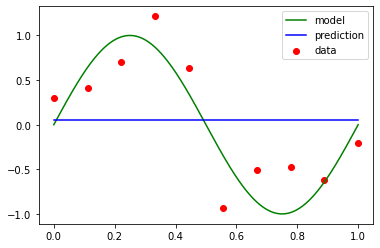

In [8]:
w, _, _, prediction, _ = sin_data.linreg_poly(0)
sin_data.plot(prediction)

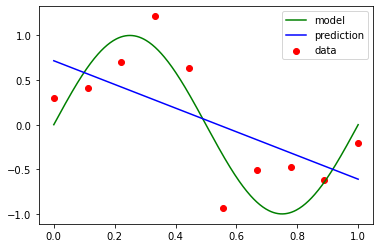

In [9]:
w, _, _, prediction, _ = sin_data.linreg_poly(1)
sin_data.plot(prediction)

(3.732678458797717, 4.403830534291348)

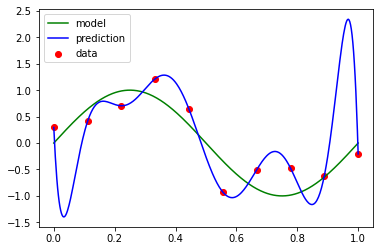

In [10]:
w, _, X_train, prediction, _ = sin_data.linreg_poly(9)
sin_data.plot(prediction)
I = np.identity(10)
Sigma = I * math.sqrt(0.3)
sin_data.y_train.T @ X_train.T @ Sigma @ X_train @ sin_data.y_train.T, sin_data.y_train.T @ sin_data.y_train.T

array([ 2.94138921e-01, -1.25405840e+02,  3.07283313e+03, -2.94711643e+04,
        1.47957602e+05, -4.28083792e+05,  7.36717375e+05, -7.43221920e+05,
        4.05342703e+05, -9.21887327e+04])

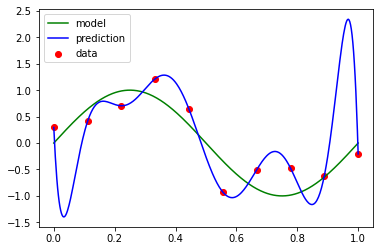

In [11]:
w, _, _, prediction, _ = sin_data.linreg_poly(9)
sin_data.plot(prediction)
w

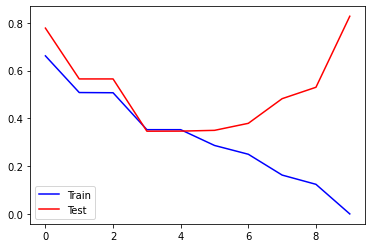

In [12]:
train_error, test_error = sin_data.RMS_error_analysis()

### Goal
fit plynomial function to this data
$$ y(x,\textbf(w))=w_0 + w_1x + w_2x^2 + \dots + w_Mx^M = \sum_{j=0}^{M}w_jx^j $$
nonlinear function of x, but linear function of the w_j.

### Error Function
**Popular choice: sum-of-squares**
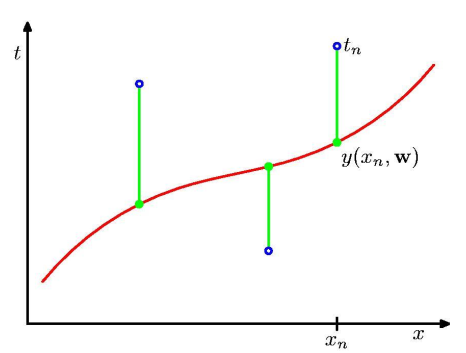
$$E(\textbf{w})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\textbf{w})-t_n\}^2$$

In [13]:
lin_data = DataSet(lambda x : 3 * x + 2)

array([1.86488324, 3.42338282])

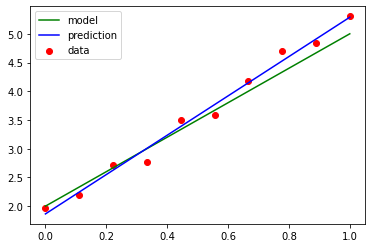

In [14]:
w, _, _, prediction, _ = lin_data.linreg_poly(1)
lin_data.plot(prediction)
w

array([ 1.97332279e+00, -1.50792890e+02,  3.45119671e+03, -3.02373536e+04,
        1.38239681e+05, -3.66797316e+05,  5.85568134e+05, -5.54400139e+05,
        2.86673348e+05, -6.23434281e+04])

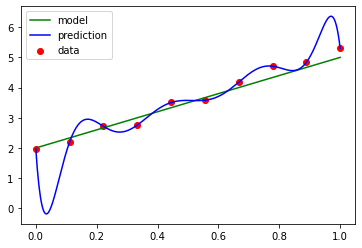

In [15]:
w, _, _, prediction, _ = lin_data.linreg_poly(9)
lin_data.plot(prediction)
w

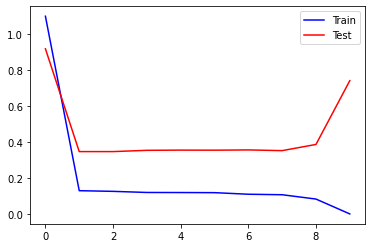

(array([1.10030765, 0.13045712, 0.12673155, 0.12056657, 0.12018011,
        0.11947631, 0.1106968 , 0.10793767, 0.08391627, 0.00129931]),
 array([0.91938809, 0.34782862, 0.34776729, 0.35488024, 0.3560327 ,
        0.3556557 , 0.35707555, 0.35318021, 0.38750261, 0.74190322]))

In [19]:
lin_data.RMS_error_analysis()